In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def view_wav(path):
    """
    Load a WAV file and plot its waveform.
    Supports mono and stereo.
    """
    # Load WAV
    sr, data = wavfile.read(path)

    # Normalize to [-1, 1] if integer format
    if data.dtype.kind in 'iu':  
        bits = data.dtype.itemsize * 8
        data = data / float(2**(bits-1))

    # Time axis in seconds
    t = np.linspace(0, len(data) / sr, num=len(data))

    plt.figure(figsize=(12, 4))

    # If stereo: plot left and right separately
    if data.ndim == 2:
        plt.plot(t, data[:,0], label="Left channel")
        plt.plot(t, data[:,1], label="Right channel", alpha=0.7)
        plt.legend()
    else:
        # plt.plot(t, data)
        plt.plot(t[:2000], data[:2000])

    plt.title(f"WAV Waveform: {path}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

    print(f"Sample rate: {sr} Hz")
    print(f"Shape: {data.shape}")
    print(data.argsort()[-5:][::-1])

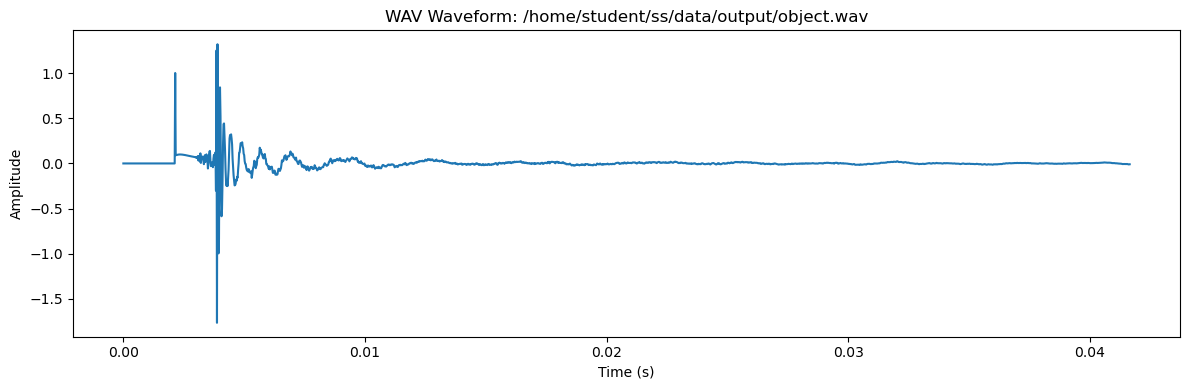

Sample rate: 48000 Hz
Shape: (119204,)
[187 185 103 192 188]


In [ ]:
view_wav("/home/student/ss/data/output/object.wav")
view_wav("/home/student/ss/data/output/object_ceiling.wav")

In [2]:
# view_wav("/home/student/ss/data/output_edited_mp3d.wav")
# view_wav("/home/student/ss/data/output.wav")

In [3]:
# view_wav("/home/student/ss/data/output/mic_outside_room.wav")
# view_wav("/home/student/ss/data/output/speaker_outside_room.wav")

In [4]:
# view_wav("/home/student/ss/data/output/mic0_binaural.wav")
# view_wav("/home/student/ss/data/output/mic6_binaural.wav")

In [5]:
# view_wav("/home/student/ss/data/output/mic6.wav")
# view_wav("/home/student/ss/data/output/mic6_rotation.wav")
# view_wav("/home/student/ss/data/output/mic6_rotation2.wav")
# view_wav("/home/student/ss/data/output/mic6_rotation3.wav")

In [6]:
# view_wav("/home/student/ss/data/output/mic6.wav")

(667200,)
243


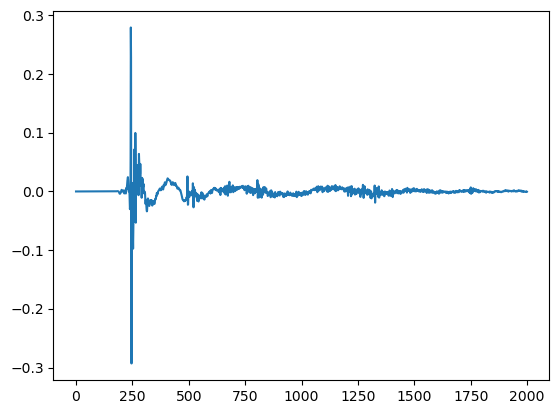

In [74]:
# %pip install librosa
# real_empty_mic0 = np.load("/home/student/ss4/soundcam-Dataset/TreatedRoom_preprocessed/Empty/deconvolved.npy", mmap_mode='r')[0, 0]
real_empty_mic0 = np.load("/home/student/ss4/soundcam-Dataset/TreatedRoom_preprocessed/Empty/deconvolved.npy", mmap_mode='r')[0, 6]

# plt.figure()
plt.plot(real_empty_mic0[0:2000]) #650:1100])
print(real_empty_mic0.shape)
print(real_empty_mic0.argmax())


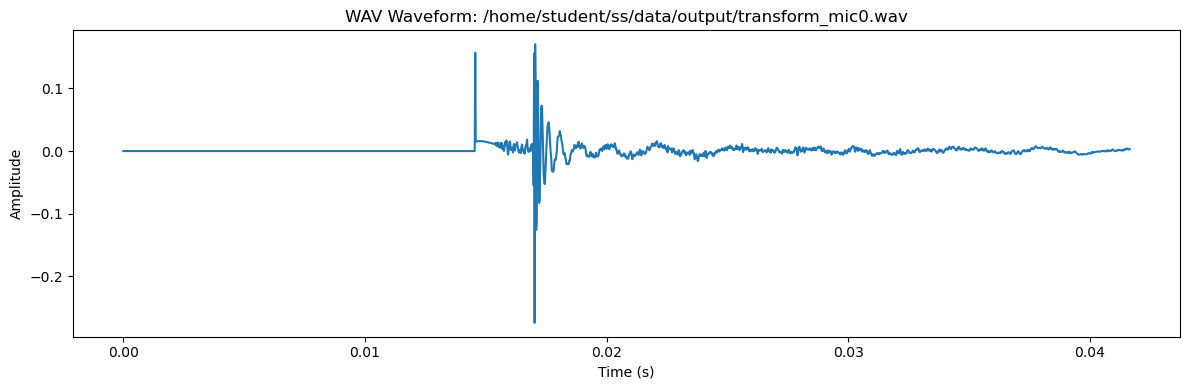

Sample rate: 48000 Hz
Shape: (119471,)
[818 699 816 823 819]


In [88]:
view_wav("/home/student/ss/data/output/transform_mic0.wav")

In [50]:
# view_wav("/home/student/ss/data/output/transform_mic0_cube.wav")
# view_wav("/home/student/ss/data/output/transform_mic0_lots.wav")
# view_wav("/home/student/ss/data/output/transform_mic0_5000000000.wav")

In [26]:
# view_wav("/home/student/ss/data/output/transform_mic0_0.wav")
# view_wav("/home/student/ss/data/output/transform_mic0_90.wav")
# view_wav("/home/student/ss/data/output/transform_mic0_180.wav")
# view_wav("/home/student/ss/data/output/transform_mic0_270.wav")

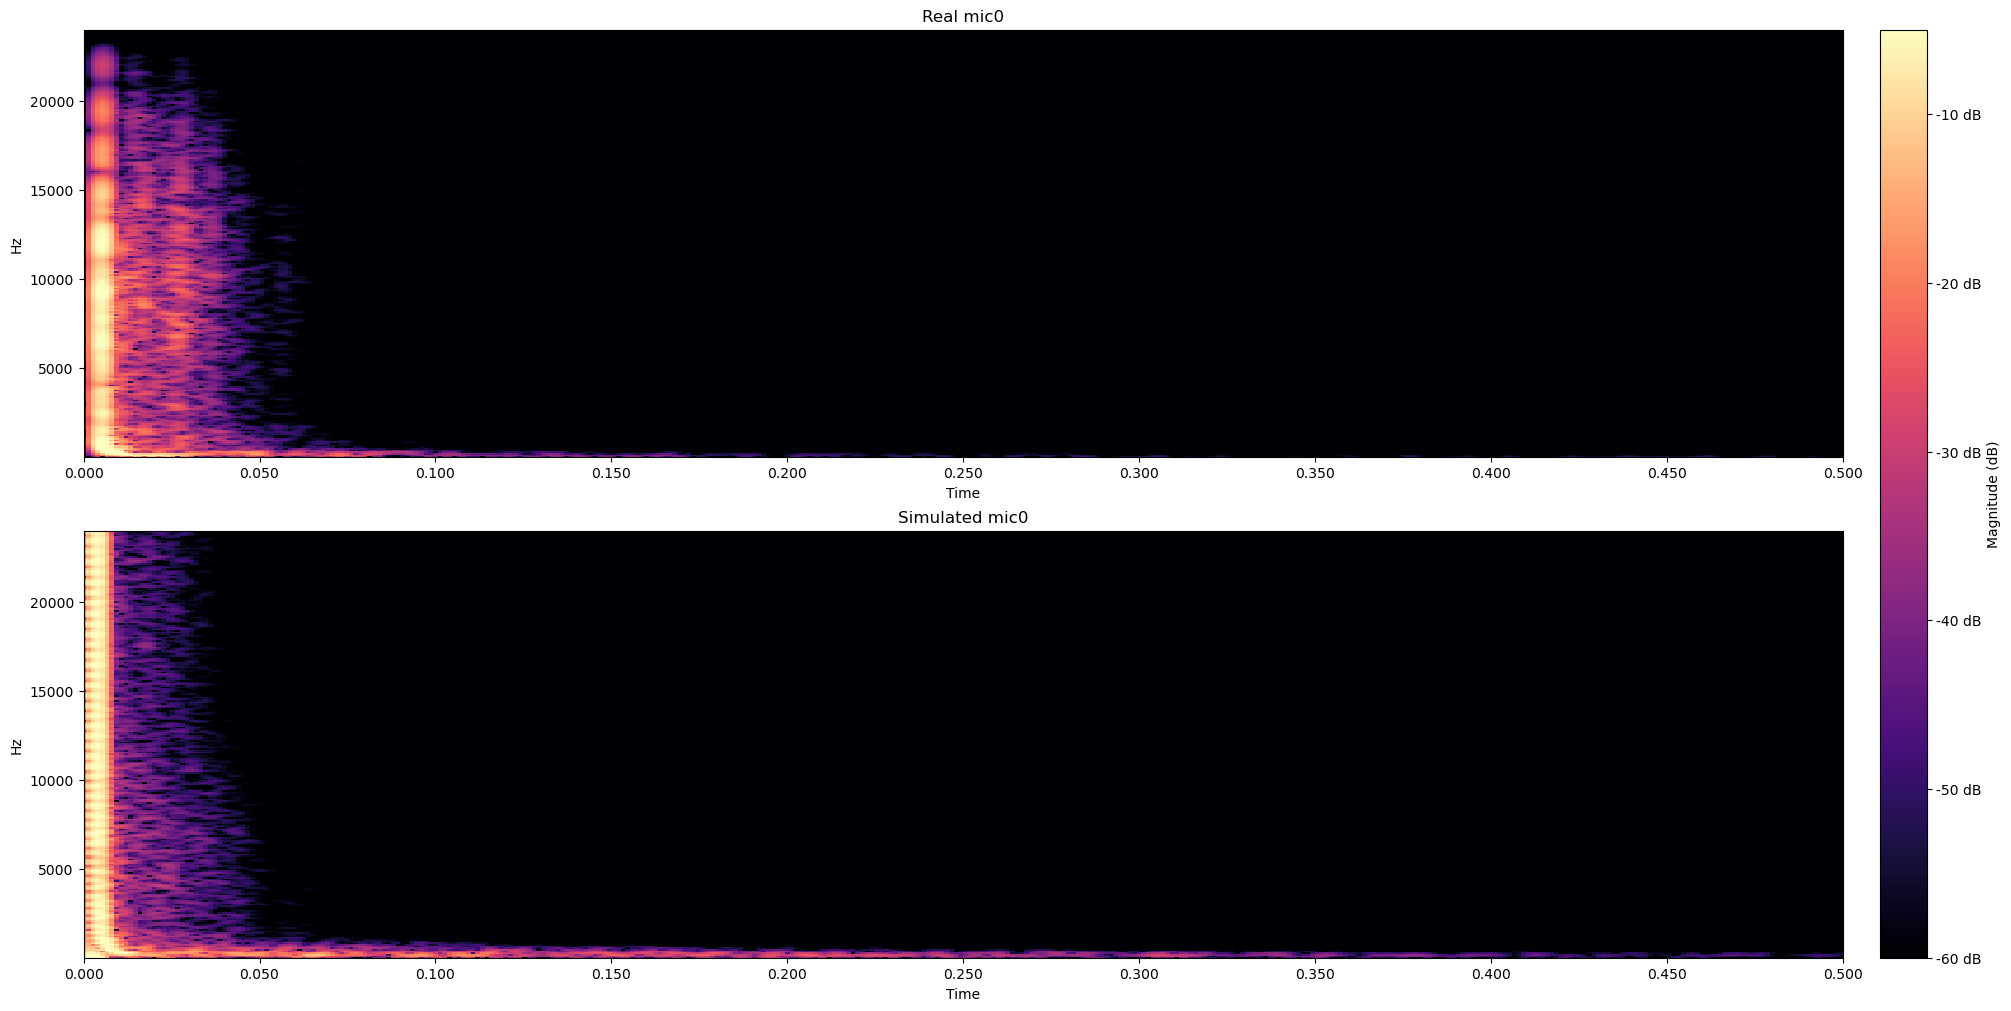

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.io import wavfile

# --- parameters ---
target_sr = 48000
n_fft = 1024//2
hop_length = 64
win_length = n_fft
cmap = 'magma'
vmin, vmax = -60, -5
t_max = 0.5

def load_wav_any(path, target_sr):
    """Load WAV as float32 in [-1, 1], resample if needed."""
    sr, data = wavfile.read(path)

    # Convert to float32
    # if np.issubdtype(data.dtype, np.integer):
    #     # scale integer PCM → float
    #     max_val = np.iinfo(data.dtype).max
    #     data = data.astype(np.float32) / max_val
    if data.dtype.kind in 'iu':  
        bits = data.dtype.itemsize * 8
        data = data / float(2**(bits-1))
    else:
        # already float
        data = data.astype(np.float32)

    # If stereo, convert to mono
    if data.ndim > 1:
        data = np.mean(data, axis=1)

    # Resample to target_sr if needed
    if sr != target_sr:
        data = librosa.resample(data, orig_sr=sr, target_sr=target_sr)
        sr = target_sr

    return sr, data

# ------------------- LOAD FILES -------------------

# sr, real_empty    = load_wav_any("/home/student/Desktop/Microphone_1.wav", target_sr)
# real_empty_mic2 = np.load("/home/student/ss4/soundcam-Dataset/TreatedRoom_preprocessed/Empty/deconvolved.npy", mmap_mode='r')[0, 2]
real_empty_mic0 = np.load("/home/student/ss4/soundcam-Dataset/TreatedRoom_preprocessed/Empty/deconvolved.npy", mmap_mode='r')[0, 6]
_, mic6_rot = load_wav_any("/home/student/ss/data/output/mic6_rotation.wav", target_sr)
_, mic6_rot2 = load_wav_any("/home/student/ss/data/output/mic6_rotation2.wav", target_sr)
_, mic6_rot3 = load_wav_any("/home/student/ss/data/output/mic6_rotation3.wav", target_sr)
sr, origin = load_wav_any("/home/student/ss/data/output/origin.wav", target_sr)
_, transform = load_wav_any("/home/student/ss/data/output/transform.wav", target_sr)
_, transform_mic0 = load_wav_any("/home/student/ss/data/output/transform_mic0.wav", target_sr)

empty_mic0 = transform_mic0
_, cube_mic0 = load_wav_any("/home/student/ss/data/output/transform_mic0_cube.wav", target_sr)

sr, mic0 = load_wav_any("/home/student/ss/data/output/mic0.wav", target_sr)
# sr, new_mic0 = load_wav_any("/home/student/ss/data/output/new_mic0.wav", target_sr)
# _, mic1 = load_wav_any("/home/student/ss/data/output/mic1.wav", target_sr)
# _, mic2 = load_wav_any("/home/student/ss/data/output/mic2.wav", target_sr)
# _, mic3 = load_wav_any("/home/student/ss/data/output/mic3.wav", target_sr)

# sr, mic4 = load_wav_any("/home/student/ss/data/output/mic4.wav", target_sr)
# _, mic5 = load_wav_any("/home/student/ss/data/output/mic5.wav", target_sr)
_, mic6 = load_wav_any("/home/student/ss/data/output/mic6.wav", target_sr)
# _, mic7 = load_wav_any("/home/student/ss/data/output/mic7.wav", target_sr)

# sr, mic8 = load_wav_any("/home/student/ss/data/output/mic8.wav", target_sr)
# _, mic9 = load_wav_any("/home/student/ss/data/output/mic9.wav", target_sr)


# signals = [mic0, mic1, mic2, mic3]
# titles = ['Mic0', 'Mic1', 'Mic2', 'Mic3']

# signals = [mic4, mic5, mic6, mic7]
# titles = ['Mic4', 'Mic5', 'Mic6', 'Mic7']

# signals = [mic0, mic6]
# titles = ['Mic0 (far away)', 'Mic6 (next to speaker)']

signals = [real_empty_mic0, transform_mic0]
titles = ['Real mic0', 'Simulated mic0']
# signals = [empty_mic0, cube_mic0]
# titles = ['Empty mic0', 'Cube mic0']

# signals = [mic6, mic6_rot, mic6_rot2, mic6_rot3]
# titles = ['Mic6 (no rotation)', 'Mic6 (90 deg)', 'Mic6 (180 deg)', 'Mic6 (270 deg)']

# signals = [real_empty_mic0, real_empty_mic6]
# titles = ['Mic0 - real (far away)', 'Mic6 - real (next to speaker)']

# --- compute spectrograms ---
S_db_list = []
for x in signals:
    needed_samples = int(t_max * sr)
    x = x[:needed_samples]

    S = np.abs(librosa.stft(
        x, n_fft=n_fft, hop_length=hop_length,
        win_length=win_length, window='hann')) ** 2

    S_db = librosa.power_to_db(S, ref=np.max)
    S_db_list.append(S_db)

# --- plotting 2x2 (your example only has 2, but layout OK) ---
fig, axs = plt.subplots(2, 1, figsize=(20, 10), constrained_layout=True)
# fig, axs = plt.subplots(2, 2, figsize=(10, 4), constrained_layout=True)
axs = axs.ravel()

for ax, S_db, title in zip(axs, S_db_list, titles):
    img = librosa.display.specshow(
        S_db, sr=sr, hop_length=hop_length,
        x_axis='time', y_axis='linear',
        ax=ax, cmap=cmap, vmin=vmin, vmax=vmax
    )
    ax.set_title(title)
    ax.set_xlim(0, t_max)
    ax.set_ylim(20, sr//2)

# Colorbar
cbar = fig.colorbar(img, ax=axs.tolist(), format='%+d dB', pad=0.01)
cbar.set_label('Magnitude (dB)')

plt.show()
